In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

Pricing Strategy: buyout
Software Revenue: 200000.00
Mean ROI: 413.81%
Median ROI: 413.54%
5th Percentile ROI: 346.38%
95th Percentile ROI: 482.28%

Pricing Strategy: monthly
Software Revenue: 55000.00
Mean ROI: 969.54%
Median ROI: 969.96%
5th Percentile ROI: 811.20%
95th Percentile ROI: 1128.43%

Pricing Strategy: daily
Software Revenue: 8.22
Mean ROI: 1099.27%
Median ROI: 1100.39%
5th Percentile ROI: 915.42%
95th Percentile ROI: 1278.36%



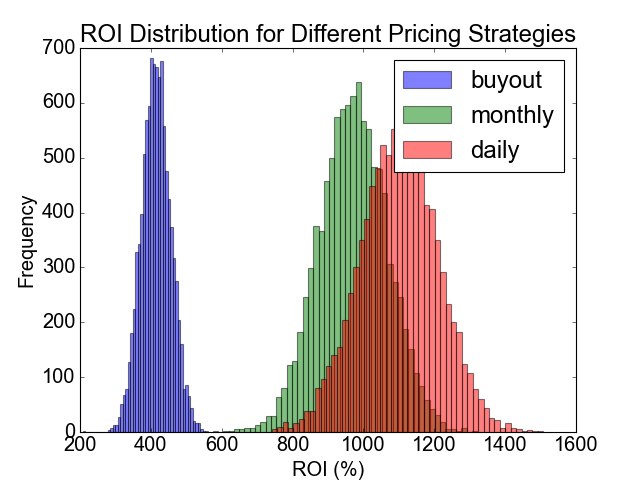

In [18]:

#Required parameters
######################################
manual_num_people = 3
manual_hours_per_catalog = 200
hourly_wage = 1000
software_num_people = 1
software_hours_per_catalog = 50
catalog_number = 3
software_basiccost = 200000
monthly_increase_ratio = 0.1  
daily_increase_ratio = 0.2   
trials = 10000
######################################


strategies = ['buyout', 'monthly', 'daily']
durations = [12, 1, 1/30]  
# Represents durations for each pricing strategy: 12 months for buyout, 1 month for monthly, and 1 day for daily.

roi_results = {}
positive_rois_strategies = []

def pricing_strategy_cost(software_basiccost, pricing_strategy, monthly_increase_ratio, daily_increase_ratio, duration):
    if pricing_strategy == 'buyout':
        return software_basiccost
    elif pricing_strategy == 'monthly':
        monthly_cost = software_basiccost / 12 * (1 + monthly_increase_ratio)
        return monthly_cost * duration
    elif pricing_strategy == 'daily':
        daily_cost = software_basiccost / (260 * 8) * (1 + daily_increase_ratio)  # 按8小时工作日计算
        return daily_cost * duration
    else:
        raise ValueError("Invalid pricing strategy")

def calculate_revenue(software_basiccost, pricing_strategy, monthly_increase_ratio, daily_increase_ratio, duration, catalog_number):
    if pricing_strategy == 'buyout':
        return software_basiccost
    elif pricing_strategy == 'monthly':
        monthly_cost = software_basiccost / 12 * (1 + monthly_increase_ratio)
        return monthly_cost * duration * catalog_number
    elif pricing_strategy == 'daily':
        daily_cost = software_basiccost / (365 * 8) * (1 + daily_increase_ratio)  # 按8小时工作日计算
        return daily_cost * duration * catalog_number

def calculate_roi(software_cost, catalog_number, manual_num_people, manual_hours_per_catalog, hourly_wage, software_num_people, software_hours_per_catalog, trials=10000):
    manual_costs = manual_num_people * manual_hours_per_catalog * hourly_wage * catalog_number
    software_operation_costs = software_num_people * software_hours_per_catalog * hourly_wage * catalog_number
    total_software_costs = software_operation_costs + software_cost

    cost_savings = manual_costs - total_software_costs
    
    if cost_savings < 0:
        cost_increase = -cost_savings
        cost_increase_percentage = (cost_increase / manual_costs) * 100
        return None, cost_increase, cost_increase_percentage

    savings_distribution = np.random.normal(cost_savings, cost_savings*0.1, trials) # 假设成本节省的标准差为10%
    rois = savings_distribution / total_software_costs * 100
    return rois, None, None



for strategy, duration in zip(strategies, durations):
    software_cost = pricing_strategy_cost(software_basiccost, strategy, monthly_increase_ratio, daily_increase_ratio, duration)
    rois, cost_increase, cost_increase_percentage = calculate_roi(software_cost, catalog_number, manual_num_people, manual_hours_per_catalog, hourly_wage, software_num_people, software_hours_per_catalog, trials)
    revenue = calculate_revenue(software_basiccost, strategy, monthly_increase_ratio, daily_increase_ratio, duration, catalog_number)
    
    if rois is not None:
        mean = np.mean(rois)
        roi_results[strategy] = rois  # Store the rois for each strategy
        positive_rois_strategies.append(strategy)
        
        print(f"Pricing Strategy: {strategy}")
        print(f"Software Revenue: {revenue:.2f}")
        median = np.median(rois)
        p5 = np.percentile(rois, 5)
        p95 = np.percentile(rois, 95)
        print(f"Mean ROI: {mean:.2f}%")
        print(f"Median ROI: {median:.2f}%")
        print(f"5th Percentile ROI: {p5:.2f}%")
        print(f"95th Percentile ROI: {p95:.2f}%\n")
    else:
        print(f"Pricing Strategy: {strategy}")
        print(f"Using the {strategy} strategy increases costs by {cost_increase:.2f} ({cost_increase_percentage:.2f}%).\n")

# Plot the ROI distribution for all pricing strategies with positive ROIs
plt.close('all')
plt.style.use('classic')
fig = plt.figure()
fig.patch.set_facecolor('w')  # background color
plt.rc('font',family='Arial',size=18) # global font
colors = ['blue', 'green', 'red']
for strategy, color in zip(positive_rois_strategies, colors):
    plt.hist(roi_results[strategy], bins=50, edgecolor='k', alpha=0.5, color=color, label=strategy)
    
plt.title('ROI Distribution for Different Pricing Strategies')
plt.xlabel('ROI (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()